Além da acuracidade, é importante avaliar o tempo de execução de um código. Em muitos casos, diferentes abordagens para resolver o mesmo problema podem produzir tempos muito distintos.

Neste exercício, o uso da linguagem Python é obrigatório, utilizando o módulo `time` para medir os tempos de execução.

a) Medindo o tempo de execução

Escreva uma função em Python que calcule a soma dos primeiros N
 inteiros positivos:

S=∑Ni=1i

Implemente duas versões:

1. Versão iterativa: utilizando um laço `for`.
2. Versão analítica: utilizando a fórmula direta S=N(N+1)2
.

Use o comando:

```python
import time
start = time.time()
# código aqui
end = time.time()
print("Tempo de execução:", end - start)
```

para medir o tempo de execução de cada versão para N=106,107,108
.

b) Comparando abordagens com listas

Crie uma lista com os números de 1 a N
 e calcule a soma:

- Usando um laço `for`.
- Usando a função `sum()` do Python.

Meça os tempos de execução para N=106,107
.
Qual abordagem foi mais rápida? Por quê?

c) Visualizando tempos

Monte um gráfico (usando `matplotlib`) comparando os tempos das diferentes abordagens para valores crescentes de N
. Use uma escala log-log para facilitar a análise.

d) (Exploração mais desafiadora)

- Implemente uma versão vetorizada da soma utilizando `numpy.arange()` e `numpy.sum()`.
- Compare o tempo de execução com as outras abordagens para valores grandes de N
.
- Discuta como a otimização interna do NumPy impacta o desempenho.

Reflexão:
Este exercício mostra que não apenas a correção, mas também a eficiência de um código importa. Em Python, soluções vetorizadas ou analíticas costumam ser significativamente mais rápidas do que laços explícitos.

| Método           |         N |   Tempo (s) |
|:-----------------|----------:|------------:|
| Iterativa        |   1000000 |   0.0691381 |
| Analítica        |   1000000 |   0         |
| Iterativa        |  10000000 |   0.678383  |
| Analítica        |  10000000 |   0         |
| Iterativa        | 100000000 |   6.32847   |
| Analítica        | 100000000 |   0         |
| Laço em Lista    |   1000000 |   0.0858865 |
| sum() embutido   |   1000000 |   0.0427463 |
| Laço em Lista    |  10000000 |   0.85607   |
| sum() embutido   |  10000000 |   0.464077  |
| NumPy vetorizado |   1000000 |   0         |
| NumPy vetorizado |  10000000 |   0.0200796 |
| NumPy vetorizado | 100000000 |   0.195493  |


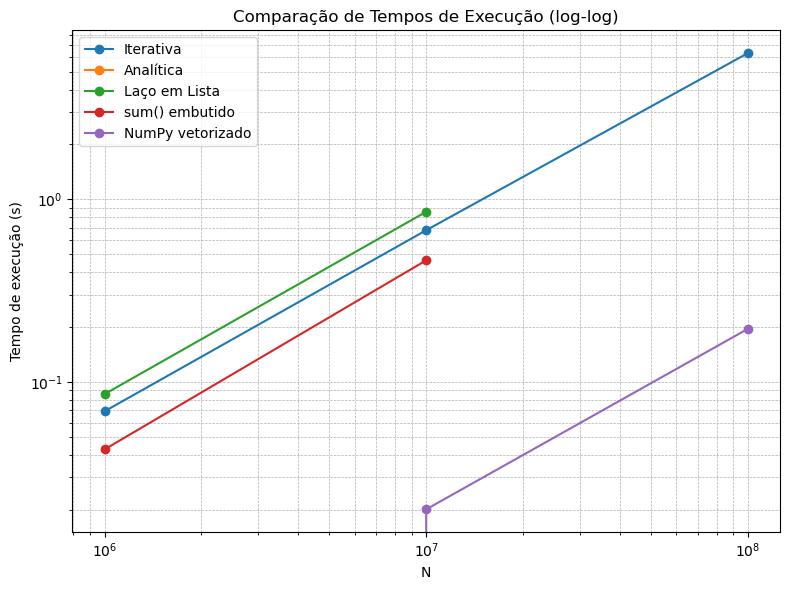

In [13]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Definição das funções de soma ---

def soma_iterativa(n):
    soma = 0
    for numero in range(1, n + 1):
        soma += numero
    return soma

def soma_analitica(n):
    return n * (n + 1) // 2

def soma_lista_for(n):
    lista = list(range(1, n + 1))
    soma = 0
    for numero in lista:
        soma += numero
    return soma

def soma_lista_sum(n):
    lista = list(range(1, n + 1))
    return sum(lista)

def soma_numpy(n):
    arr = np.arange(1, n + 1)
    return arr.sum()

# --- Valores de N para cada parte ---
Ns_a = [10**6, 10**7, 10**8]   # para parte a e parte d
Ns_b = [10**6, 10**7]          # para parte b

# --- Coleta dos tempos de execução ---
resultados = []

# Parte a: iterativa vs. analítica
for n in Ns_a:
    inicio = time.time()
    soma_iterativa(n)
    resultados.append({"Método": "Iterativa",    "N": n, "Tempo (s)": time.time() - inicio})
    
    inicio = time.time()
    soma_analitica(n)
    resultados.append({"Método": "Analítica",    "N": n, "Tempo (s)": time.time() - inicio})

# Parte b: laço em lista vs. sum() embutido
for n in Ns_b:
    inicio = time.time()
    soma_lista_for(n)
    resultados.append({"Método": "Laço em Lista", "N": n, "Tempo (s)": time.time() - inicio})
    
    inicio = time.time()
    soma_lista_sum(n)
    resultados.append({"Método": "sum() embutido","N": n, "Tempo (s)": time.time() - inicio})

# Parte d: NumPy vetorizado
for n in Ns_a:
    inicio = time.time()
    soma_numpy(n)
    resultados.append({"Método": "NumPy vetorizado","N": n, "Tempo (s)": time.time() - inicio})

# --- Criação do DataFrame ---
df = pd.DataFrame(resultados)

# --- Impressão em formato Markdown ---
print(df.to_markdown(index=False))

# --- Gráfico comparativo (escala log-log) ---
plt.figure(figsize=(8, 6))
for metodo in df["Método"].unique():
    df_met = df[df["Método"] == metodo]
    plt.loglog(df_met["N"], df_met["Tempo (s)"], marker='o', label=metodo)
plt.xlabel("N")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação de Tempos de Execução (log-log)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()


Apesar do poder dos computadores modernos, somar uma série numérica com muitos termos pode exigir cuidado com a ordem das operações. Em ponto flutuante, a ordem em que somamos os termos pode afetar significativamente a acuracidade do resultado.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize `numpy` e `matplotlib` conforme necessário.

a) Soma crescente e decrescente

Considere a seguinte soma harmônica finita:

Sup=∑Nn=11n,Sdown=∑1n=N1n

Matematicamente, ambas devem produzir o mesmo resultado para qualquer N
. No entanto, ao utilizar números em ponto flutuante, pode haver diferenças devido a erros de arredondamento acumulados.

Tarefa:

- Escreva um programa em Python que calcule Sup
 e Sdown
 como função de N
.
- Calcule o erro relativo entre as duas somas usando a expressão:

Erro relativo=|Sup−Sdown||Sup|+|Sdown|

b) Análise gráfica do erro

- Faça um gráfico log-log do erro relativo versus N
, para N
 variando de 10
 até 107
.
- Interprete o comportamento do gráfico. Você observa uma região linear?

c) Interpretação e explicação

- Por que a soma decrescente (do maior para o menor termo) tende a ser mais precisa?
- Relacione isso com o fato de que, em ponto flutuante, adicionar termos muito pequenos a valores grandes pode não alterar o resultado devido à limitação do número de dígitos significativos.

d) (Exploração mais desafiadora)

Implemente uma terceira estratégia de soma chamada "soma compensada de Kahan". Ela visa reduzir os erros de arredondamento acumulados. A fórmula funciona com uma variável de compensação que armazena os erros perdidos durante cada adição.

- Reimplemente a soma crescente usando o algoritmo de Kahan.
- Compare os valores obtidos com os das somas simples crescentes e decrescentes.
- Plote os erros relativos das três versões em um mesmo gráfico log-log para comparação.

Reflexão:
Este exercício mostra que a ordem em que realizamos somas pode afetar o resultado numérico, mesmo em operações aparentemente simples. Em particular, somar do menor para o maior pode levar à perda de informação, enquanto somar do maior para o menor tende a preservar melhor a precisão dos primeiros termos. Algoritmos como o de Kahan são importantes ferramentas numéricas para mitigar esse tipo de erro.
























   N    | Soma ↑      | Soma ↓      | Erro Relativo
--------+-------------+-------------+--------------
     10 |  2.92896825 |  2.92896825 | 0.00e+00
    126 |  5.41746058 |  5.41746058 | 1.64e-16
   2120 |  8.23662286 |  8.23662286 | 0.00e+00
  35564 | 11.05631889 | 11.05631889 | 1.61e-16
 596362 | 13.87581965 | 13.87581965 | 2.56e-16
10000000 | 16.69531137 | 16.69531137 | 1.28e-15


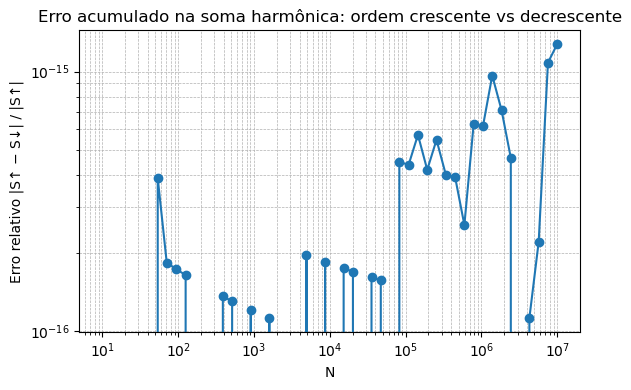

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def soma_harmonica_crescente(N):
    """∑_{n=1}^N 1/n em ponto flutuante, ordem crescente."""
    return np.sum(1.0 / np.arange(1, N+1))

def soma_harmonica_decrescente(N):
    """∑_{n=N}^1 1/n em ponto flutuante, ordem decrescente."""
    return np.sum(1.0 / np.arange(N, 0, -1))

def erro_relativo(s_cres, s_dec):
    """Erro relativo entre duas somas: |cres - dec| / |cres|."""
    return np.abs(s_cres - s_dec) / np.abs(s_cres)

# Vetor de valores de N para teste (crescendo exponencialmente)
Ns = np.logspace(1, 7, num=50, dtype=int)  # de N=10 até N=10^7, 50 pontos

erros = []
for N in Ns:
    s_up   = soma_harmonica_crescente(N)
    s_down = soma_harmonica_decrescente(N)
    erros.append(erro_relativo(s_up, s_down))

erros = np.array(erros)

# Imprime alguns valores destacados
print("   N    | Soma ↑      | Soma ↓      | Erro Relativo")
print("--------+-------------+-------------+--------------")
for i in np.linspace(0, len(Ns)-1, 6, dtype=int):
    N = Ns[i]
    s_up = soma_harmonica_crescente(N)
    s_down = soma_harmonica_decrescente(N)
    err = erros[i]
    print(f"{N:7d} | {s_up:11.8f} | {s_down:11.8f} | {err:.2e}")

# Plot do erro relativo vs N em escala log-log
plt.figure(figsize=(6,4))
plt.loglog(Ns, erros, marker='o', linestyle='-')
plt.xlabel("N")
plt.ylabel("Erro relativo |S↑ − S↓| / |S↑|")
plt.title("Erro acumulado na soma harmônica: ordem crescente vs decrescente")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()


A representação de números reais em computadores usa o formato de ponto flutuante, o que pode introduzir erros de arredondamento e perda de precisão. Esses efeitos podem se tornar críticos em certas situações.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize as bibliotecas `math`, `numpy` e `matplotlib` sempre que necessário. Em especial, utilize `numpy.float32` e `numpy.float64` para explorar diferentes níveis de precisão.

a)
Escreva um programa em Python que calcule a seguinte expressão, variando o valor de x
 em torno de zero (por exemplo, de 10−1
 até 10−15
):

f(x)=1−cos(x)x2

Compare os valores obtidos com o valor limite teórico da função conforme x→0
, que é:

limx→01−cos(x)x2=12

Utilize gráficos em Python para visualizar o comportamento da função à medida que x
 se aproxima de 0. O que você observa para valores muito pequenos de x
? Como o cancelamento numérico afeta o resultado?

b)
Reescreva a função anterior em Python utilizando a identidade trigonométrica:

1−cos(x)=2sin2(x2)

E recalcule a função como:

f(x)=2sin2(x2)x2

Compare os resultados obtidos com os da letra anterior utilizando o mesmo gráfico. Há melhora na precisão numérica? Explique por que isso acontece em seu código ou relatório.

c)
Inclua em seu script Python um comentário explicando com suas palavras o que é cancelamento catastrófico em ponto flutuante. Dê também um exemplo adicional (em Python) onde isso pode ocorrer, além do exemplo envolvendo cosseno.

d) (Exploração adicional: Precisão simples vs. dupla)

- Refaça os cálculos das expressões das letras (a) e (b) utilizando explicitamente os tipos `numpy.float32` e `numpy.float64`.
- Plote os erros relativos entre os valores numéricos e o valor teórico 12
.
- Qual tipo de precisão apresenta melhor estabilidade numérica?
- Comente as implicações do uso de cada tipo de precisão em aplicações reais.

Reflexão:
Este exercício mostra que expressões matematicamente equivalentes podem se comportar de maneira muito diferente no computador. A escolha de como escrever a fórmula e o tipo de precisão usada podem afetar fortemente os resultados. Em ciência computacional, compreender e controlar o erro numérico é essencial para garantir resultados confiáveis.
























Exemplo de cancelamento catastrófico:
Float64: 1.1102230246251565e-15
Float32: 1.1920929e-07


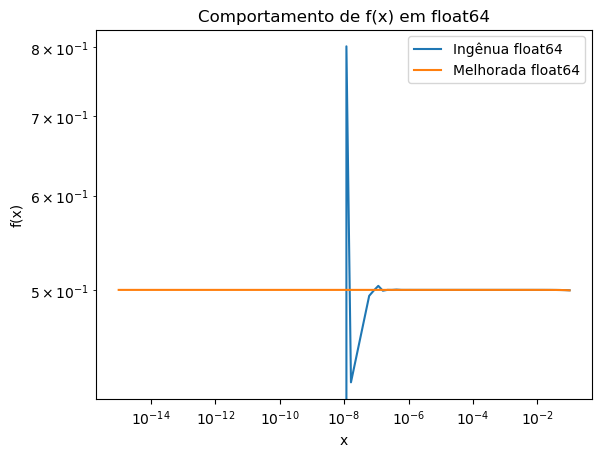

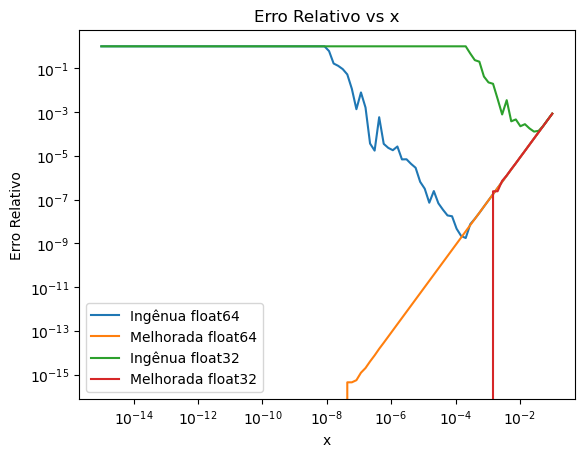

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Cancelamento catastrófico: subtração de valores muito próximos perde precisão.
# Exemplo adicional:
a64 = np.float64(1.000000000000001)
b64 = np.float64(1.0)
diff64 = a64 - b64

a32 = np.float32(1.0000001)
b32 = np.float32(1.0)
diff32 = a32 - b32

print("Exemplo de cancelamento catastrófico:")
print("Float64:", diff64)
print("Float32:", diff32)

# Definição das funções
def f_ingenua(x):
    return (1 - np.cos(x)) / x**2

def f_melhorada(x):
    return 2 * np.sin(x/2)**2 / x**2

# Geração dos valores de x de 1e-1 até 1e-15
x = np.logspace(-1, -15, num=100)

# Cálculos em precisão dupla (float64)
x64 = x.astype(np.float64)
f_ingenua64 = f_ingenua(x64)
f_melhorada64 = f_melhorada(x64)

# Cálculos em precisão simples (float32)
x32 = x.astype(np.float32)
f_ingenua32 = f_ingenua(x32).astype(np.float32)
f_melhorada32 = f_melhorada(x32).astype(np.float32)

# Valor teórico do limite
valor_teorico = 0.5

# Cálculo dos erros relativos
erro_ingenua64 = np.abs(f_ingenua64 - valor_teorico) / valor_teorico
erro_melhorada64 = np.abs(f_melhorada64 - valor_teorico) / valor_teorico
erro_ingenua32 = np.abs(f_ingenua32 - valor_teorico) / valor_teorico
erro_melhorada32 = np.abs(f_melhorada32 - valor_teorico) / valor_teorico

# Gráfico 1: f(x) vs x em float64
plt.figure()
plt.loglog(x, f_ingenua64, label='Ingênua float64')
plt.loglog(x, f_melhorada64, label='Melhorada float64')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comportamento de f(x) em float64')
plt.legend()
plt.show()

# Gráfico 2: Erro relativo vs x para todas as versões
plt.figure()
plt.loglog(x, erro_ingenua64, label='Ingênua float64')
plt.loglog(x, erro_melhorada64, label='Melhorada float64')
plt.loglog(x, erro_ingenua32, label='Ingênua float32')
plt.loglog(x, erro_melhorada32, label='Melhorada float32')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo vs x')
plt.legend()
plt.show()


Exemplo de cancelamento catastrófico:
Float64: 1.000000000000001 - 1.0 = 1.1102230246251565e-15
Float32: 1.0000001 - 1.0 = 1.1920929e-07


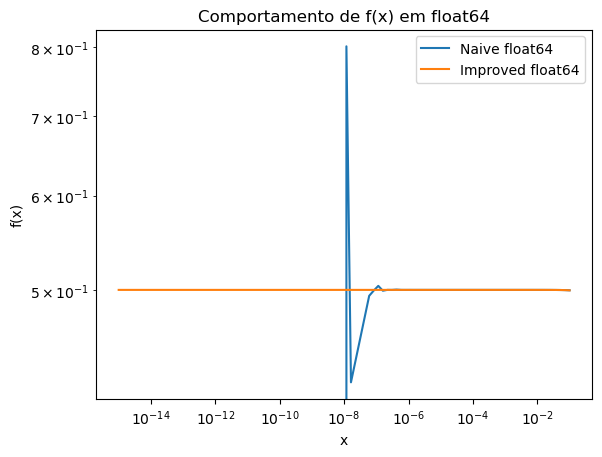

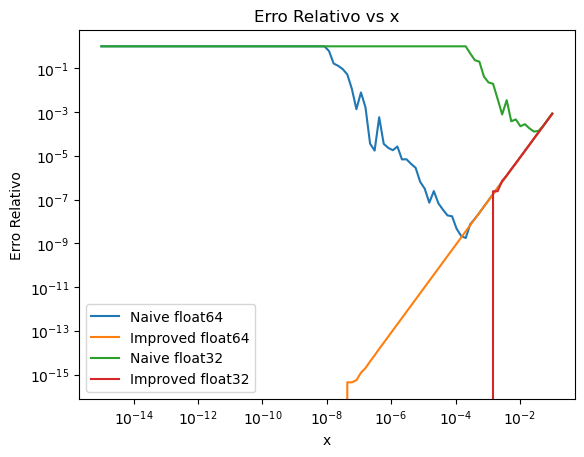

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Cancelamento catastrófico: operação de subtração entre valores muito próximos perde precisão.
# Exemplo adicional: subtração de dois números quase iguais em float32 e float64
a64 = np.float64(1.000000000000001)
b64 = np.float64(1.0)
diff64 = a64 - b64

a32 = np.float32(1.0000001)
b32 = np.float32(1.0)
diff32 = a32 - b32

print("Exemplo de cancelamento catastrófico:")
print("Float64: 1.000000000000001 - 1.0 =", diff64)
print("Float32: 1.0000001 - 1.0 =", diff32)

# Definição das funções f_naive e f_improved
def f_naive(x):
    return (1 - np.cos(x)) / x**2

def f_improved(x):
    return 2 * np.sin(x/2)**2 / x**2

# Valores de x de 1e-1 até 1e-15
x = np.logspace(-1, -15, num=100)

# Cálculos em float64
x64 = x.astype(np.float64)
f_naive64 = f_naive(x64)
f_improved64 = f_improved(x64)

# Cálculos em float32
x32 = x.astype(np.float32)
f_naive32 = f_naive(x32).astype(np.float32)
f_improved32 = f_improved(x32).astype(np.float32)

# Valor teórico limite
theoretical = 0.5

# Erros relativos
err_naive64 = np.abs(f_naive64 - theoretical) / theoretical
err_improved64 = np.abs(f_improved64 - theoretical) / theoretical
err_naive32 = np.abs(f_naive32 - theoretical) / theoretical
err_improved32 = np.abs(f_improved32 - theoretical) / theoretical

# Gráfico 1: f(x) vs x para float64
plt.figure()
plt.loglog(x, f_naive64, label='Naive float64')
plt.loglog(x, f_improved64, label='Improved float64')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comportamento de f(x) em float64')
plt.legend()
plt.show()

# Gráfico 2: Erro relativo vs x para ambas as precisões e versões
plt.figure()
plt.loglog(x, err_naive64, label='Naive float64')
plt.loglog(x, err_improved64, label='Improved float64')
plt.loglog(x, err_naive32, label='Naive float32')
plt.loglog(x, err_improved32, label='Improved float32')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo vs x')
plt.legend()
plt.show()
